<a href="https://colab.research.google.com/github/BlacK-EyE1/WHO-Life-Expectancy/blob/main/Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA PROJECT

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Why this dataset?

I have chosen this dataset because through this dataset, I can get answers on
how life expectancy is cruicial to know the development of any country. A 
country's development depends on its public. If they don't know about their 
population's health and life expectancy, how can they grow? So, through this dataset, I can help countries by suggesting which areas they should give importance to efficiently imporove the life expectancy of their population because this things can be very helpful for countries to make their policy.

# Which Domain?

This dataset belongs to health domain. The life expectancy of any country is cruicial and prominent in reasearch and policy.

# Dataset description

The dataset realted to life expectancy, health factors for 193 countries has been collected from the same WHO data repository webiste and its corresponding econimic data was collected from United Nation website. Among all categories health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years, There has been a huge development in health sector resulitng in improvement of human mortality rates especially in the developing nation in comparison to the past 30 years.
Therefore, in this project we have considered data from year 2000- 2015 for 193 countries for furthere analysis. The individual data files have been merged together intoa  single dataset.

This dataset consists of 22 columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories: Immunization related factors, mortality facotrs, Economical factors and Social factors.

#In order to understand the data we need to know the meaning of each column.

1.Country - Country name

2.Year - Year

3.Status - Status of the given country (Either Developing or Developed)

4.Life expectancy - in years

5.Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

6.Infant deaths - Number of Infant Deaths per 1000 population

7.Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

8.Percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

9.Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

10.Measles - Measles - number of reported cases per 1000 population

11.BMI - Average Body Mass Index of entire population

12.Under five death - Number of under-five deaths per 1000 population

13.Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

14.Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)

15.Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

16.HIV/AID - Deaths per 1 000 live births HIV/AIDS (0-4 years)

17.GDP - Gross Domestic Product per capita (in USD)

18.Population - Population of the country

19.thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

20.thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)

21.Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

22.Schooling - Number of years of Schooling(years)

# Key questions:

1. All 20 predicting factors are chosen really affects the life expectancy. Whare are the prediciting factors actually affecting the life expectancy?

2. How does Infant and Adult mortaility rates affect life expectancy?

3. Does life expectancy have positive and negative realtionship with drinking alcohol?

4. Does life expectancy have positive or negative correlation with lifestyle, exercies, etc.

5. Do densley populated countries tend to have lower life expectancy?

6. How is development or GDP of any country correlated with life expectancy?

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [4]:
life_data = pd.read_csv("/content/drive/MyDrive/EDA/Life Expectancy Data.csv")


In [5]:
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

1. Total object type are 2: Country, Status
2. Total Float type are 16: Life expectancy, Adult Mortality, Alcohol, percentage expenditure, Hepatitis B, BMI, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness 1-19 years, Thinness 5-9 years, Income composition of resources, Schooling
3. Total int type: Year, infant deaths, Measles, Under-five deaths 

In [7]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
life_data.shape

(2938, 22)

# DATA CLEANING AND PREPRATION

### Renaming columns for easy access

In [9]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
life_data.rename(columns = {'Country':'country',
                       'Year':'year',
                       'Status':'status',
                       'Life expectancy ':'life_expectancy', 
                       'Adult Mortality':'adult_mortality', 
                       'infant deaths':'infant_deaths',
                       'Alcohol':'alcohol',
                       'percentage expenditure':'percentage_expenditure',
                       'Hepatitis B':'hepatitis_b',
                       'Measles ':'measles',
                       ' BMI ':'bmi',
                       'under-five deaths ':'under-five_deaths',
                       'Polio':'polio',
                       'Total expenditure':'total_expenditure',
                       'Diphtheria ':'diphtheria',
                       ' HIV/AIDS':'hiv/aids',
                       'GDP':'gdp',
                       'Population':'population',
                       ' thinness  1-19 years':'thinness_1_19_years',
                       ' thinness 5-9 years':'thinness_5_9_years',
                       'Income composition of resources':'income_composition_of_resources',
                       'Schooling':'schooling'
                       }, inplace = True)

In [11]:
life_data.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
life_data.duplicated().sum()

0

So, there is no duplicates

### MISSING VALUES

In [13]:
life_data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [14]:
(life_data.isnull().sum()/life_data.shape[0])*100

country                             0.000000
year                                0.000000
status                              0.000000
life_expectancy                     0.340368
adult_mortality                     0.340368
infant_deaths                       0.000000
alcohol                             6.603131
percentage_expenditure              0.000000
hepatitis_b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five_deaths                   0.000000
polio                               0.646698
total_expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness_1_19_years                 1.157250
thinness_5_9_years                  1.157250
income_composition_of_resources     5.684139
schooling                           5.547992
dtype: flo

Missing value percentange in each column.
So I categorize them in three categories 
1. High (if percentage of missing values is greater than or equal to 5 percent)
2. Low (if percentage of missing values is less than 5 percent and greater than zero) 
3. NULL (zero missing values)

So, the columns comes in these three categories are:

1. High: Alcohol, Hepatitis B, Total Expenditure, GDP, Population, Income composition of resources and Schooling.

   Total: 7 columns

2. Low: Life expectancy, Adult mortality, BMI, Polio, diptheria, Thinness 1-19 years and thiness 5-9 years.

   Total: 7 columns

3. NULL: country, year, status, Infant deaths, percentage expenditure, Measles, Under-five deaths and HIV/AIDS.

   Total: 8 columns

I made my own convention to handle the missing values in my data frame.

Therefore, I will handle this three categories differently to handle the missing values.
so, If the column is from high category then I will impute them issing value with mean, median and mode.
If the column is from low category then I will delete those rows and columns.
If the column is forom NULL category then there is nothing to do.

## Low category columns

Life expectancy, Adult mortality, BMI, Polio, Diptheria, Thinness 1-19 years and thiness 5-9 years.
We are going to drop this columns missing values because this are Missing completely at random(MCAR)

In [15]:
##drop the records with life_expectancy missing in data and copy in data_s dataframe
data_s= life_data[~life_data.life_expectancy.isnull()].copy()

In [16]:
data_s.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            193
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 32
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness_1_19_years                 32
thinness_5_9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

By deleting life_expectancy missing value our adult_mortality column missing values also get deleted. Both are from same category then there is no problem.

In [17]:
#drop the records with bmi missing in data_s
data_s= data_s[~data_s.bmi.isnull()]

In [19]:
data_s.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            176
percentage_expenditure               0
hepatitis_b                        533
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                8
total_expenditure                  212
diphtheria                           8
hiv/aids                             0
gdp                                435
population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
income_composition_of_resources    160
schooling                          160
dtype: int64

By deleting BMI coloumn missing values,missing value of thinness 1-19 years and thinness 5-9 years also got deleted. 
Because BMI is related to thinness. If we don't have the BMI Data of any country we can't get the data for thinness.

In [20]:
#drop the records with polio missing in data_s
data_s= data_s[~data_s.polio.isnull()]

In [21]:
data_s.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            175
percentage_expenditure               0
hepatitis_b                        525
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                0
total_expenditure                  212
diphtheria                           0
hiv/aids                             0
gdp                                435
population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
income_composition_of_resources    160
schooling                          160
dtype: int64

polio and diptheria column missing values get deleted. There is no relationship between diptheria and polio. Both disease are different.

## High category columns

Alcohol, Hepatitis B, Total Expenditure, GDP, Population, Income composition of resources and Schooling.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

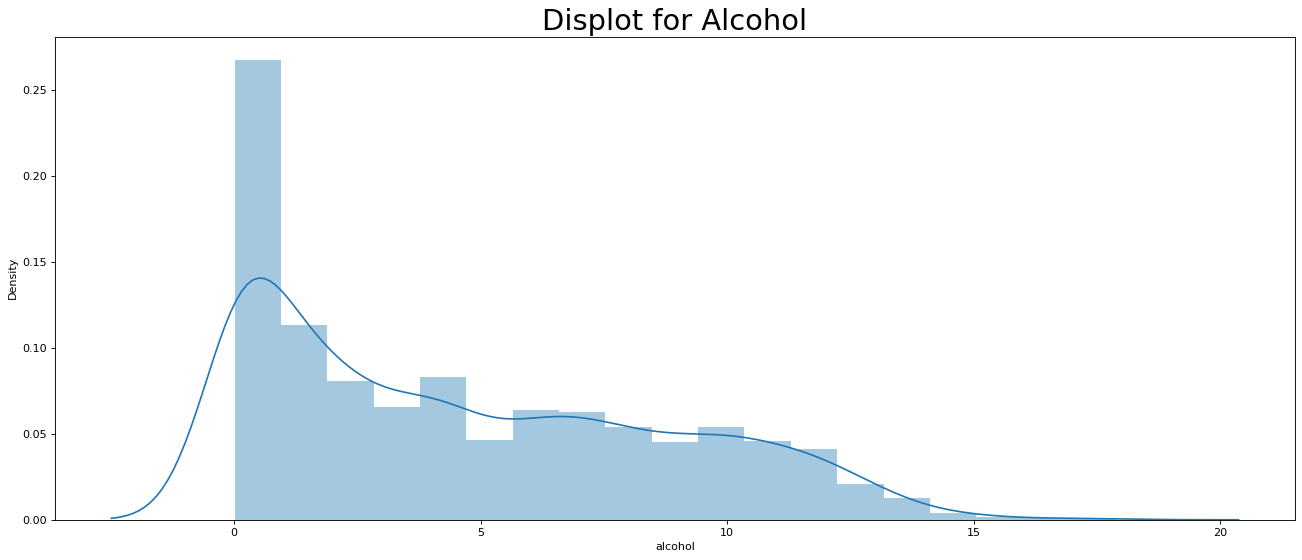

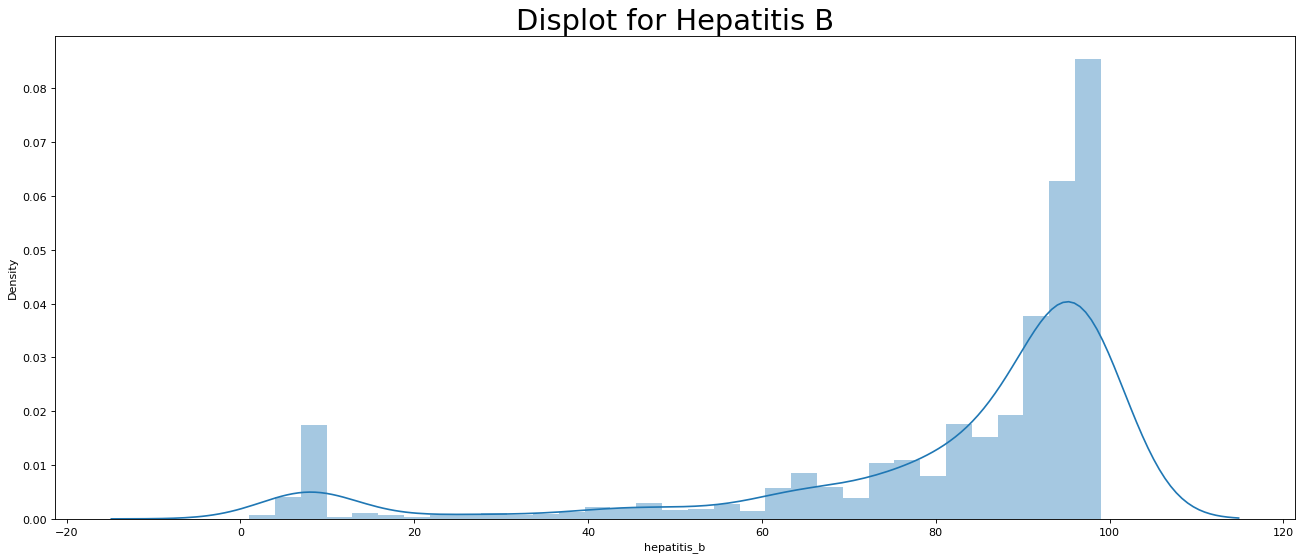

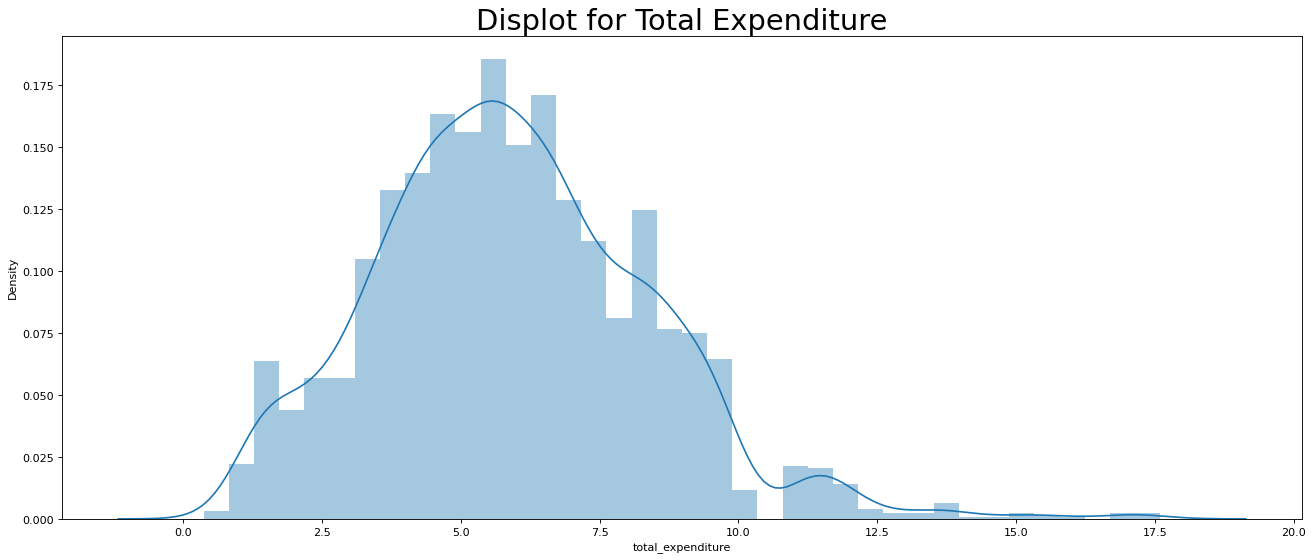

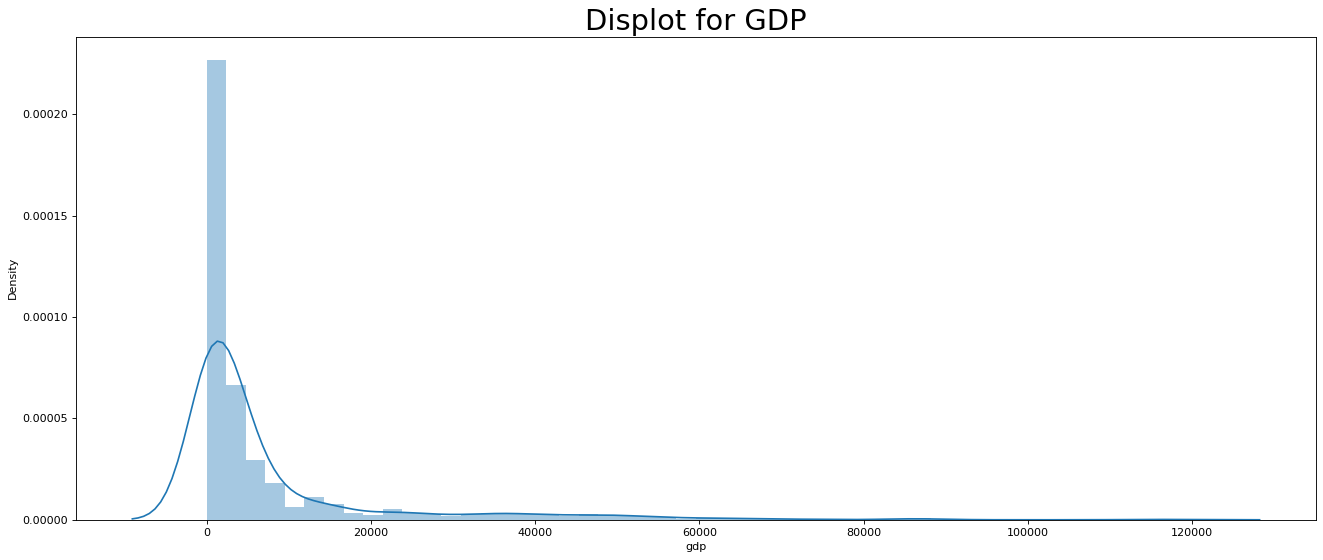

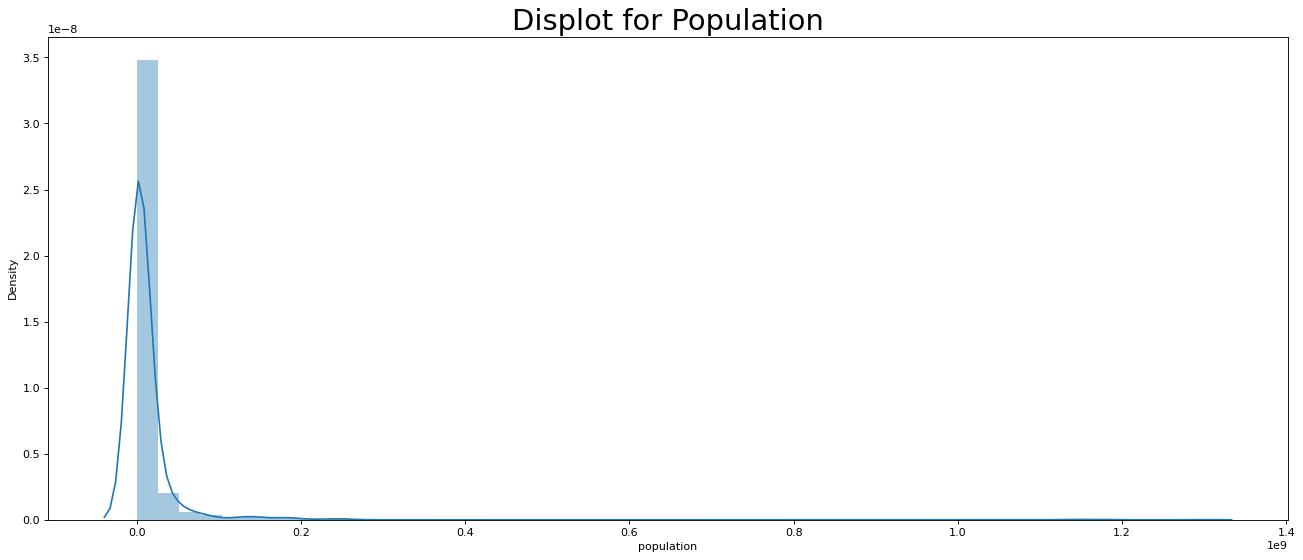

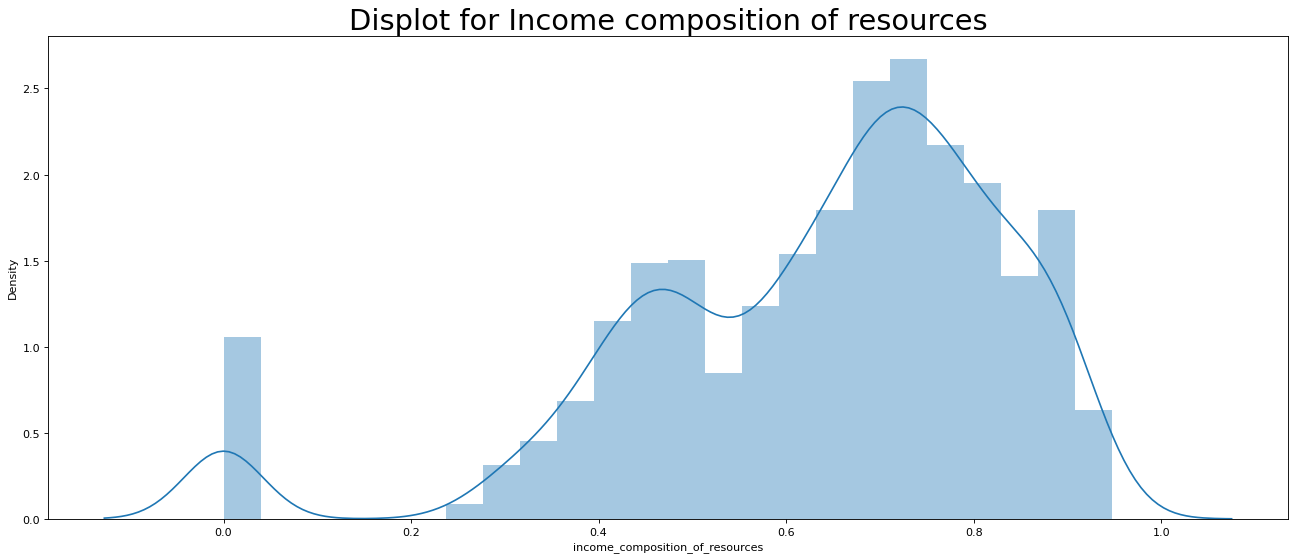

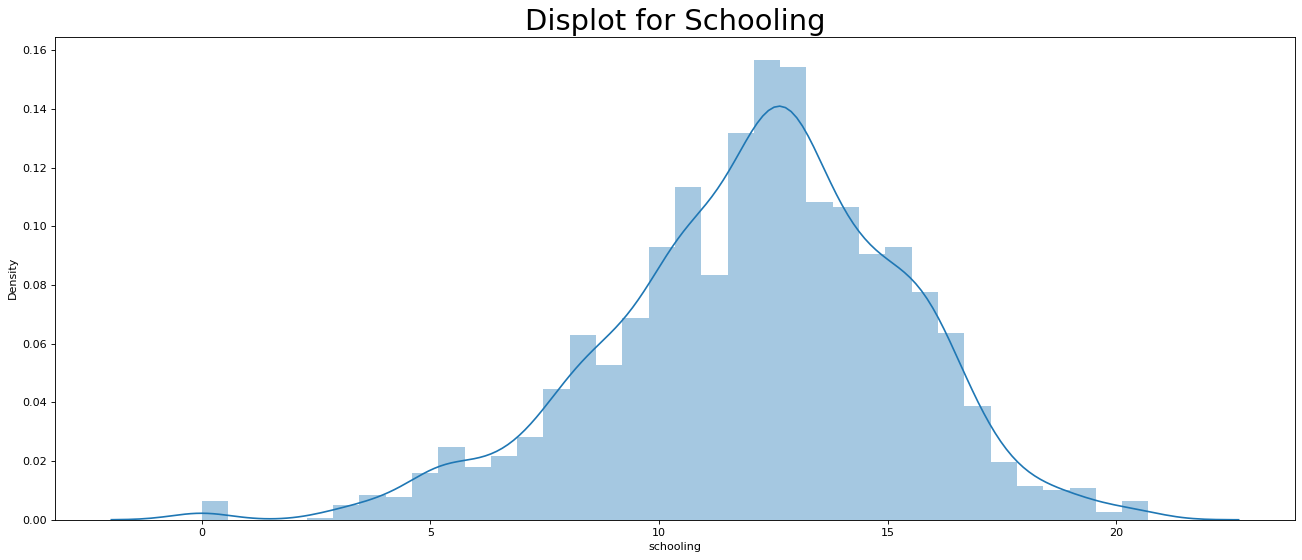

In [28]:
df_name = ['Alcohol','Hepatitis B', 'Total Expenditure', 'GDP', 'Population',
           'Income composition of resources','Schooling']
j = 0
df_lst = [data_s.alcohol,
          data_s.hepatitis_b,
          data_s.total_expenditure,
          data_s.gdp,
          data_s.population,
          data_s.income_composition_of_resources,
          data_s.schooling]

for i in df_lst:
    plt.figure(figsize=(20,8), dpi= 80)
    sns.distplot(i)
    plt.title('Displot for '+str(df_name[j]), fontdict={'fontsize':26})
    j += 1

From above observation we can see that all columns are either right-skewed or left-skewed.
Therefore, alcohol,gdp,total expenditure and population are right-skewed. Hepatitis B, income composition for resources and Schooling.

So, we know that data is skewed. There are several or large numbers of data points that act as outliers. Outliers data points will have a singificant impact on the mean and heance, in such cases, it is not recommended to use the mean for replacing the missing values.
For symmetric data distribution, one can use the mean value for imputing missing values.

### Calulating median and imputing them inplace of missing values.

In [29]:
data_s.alcohol.fillna(data_s.alcohol.median(), inplace = True)


In [30]:
data_s.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                              0
percentage_expenditure               0
hepatitis_b                        525
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                0
total_expenditure                  212
diphtheria                           0
hiv/aids                             0
gdp                                435
population                         644
thinness_1_19_years                  0
thinness_5_9_years                   0
income_composition_of_resources    160
schooling                          160
dtype: int64

In [31]:
data_s.hepatitis_b.fillna(data_s.hepatitis_b.median(), inplace = True)

In [32]:
data_s.total_expenditure.fillna(data_s.total_expenditure.median(), inplace = True)

In [33]:
data_s.gdp.fillna(data_s.gdp.median(), inplace = True)

In [34]:
data_s.population.fillna(data_s.population.median(), inplace = True)

In [35]:
data_s.income_composition_of_resources.fillna(data_s.income_composition_of_resources.median(), inplace = True)

In [36]:
data_s.schooling.fillna(data_s.schooling.median(), inplace = True)

In [37]:
data_s.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

## So, here we handle all missing values.

In [38]:
data_s.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2.888000e+03,2888.000000,2888.000000,2888.000000,2888.000000
mean,2007.515235,69.349377,163.357341,30.314751,4.593303,749.475611,83.017659,2442.514543,38.221087,41.985803,82.672091,5.918293,82.437673,1.749792,6708.556955,1.028173e+07,4.850589,4.881337,0.635144,12.132029
std,4.606938,9.495441,124.018934,118.891670,3.933788,2003.090073,22.985034,11561.322467,19.962630,161.743345,23.333655,2.390261,23.648907,5.116551,13390.411249,5.446481e+07,4.421403,4.510414,0.200702,3.108019
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.475000,73.000000,0.000000,1.107500,5.049462,82.000000,0.000000,19.300000,0.000000,78.000000,4.370000,78.000000,0.100000,579.651825,4.158228e+05,1.600000,1.500000,0.511750,10.400000
50%,2008.000000,72.200000,143.000000,3.000000,3.810000,67.687008,92.000000,17.000000,43.250000,4.000000,93.000000,5.750000,93.000000,0.100000,1812.288374,1.383743e+06,3.350000,3.400000,0.679500,12.400000
75%,2012.000000,75.800000,225.000000,21.000000,7.490000,454.422430,96.000000,352.250000,56.100000,26.000000,97.000000,7.322500,97.000000,0.800000,4901.575091,4.570096e+06,7.200000,7.200000,0.774000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [53]:
data_s['gdp'].median()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


1812.288374

#Outliers

Detect the outliers Boxplots

#Outliers Detection
To visually see if there are any outliers a boxplot will be constructed for each variable.


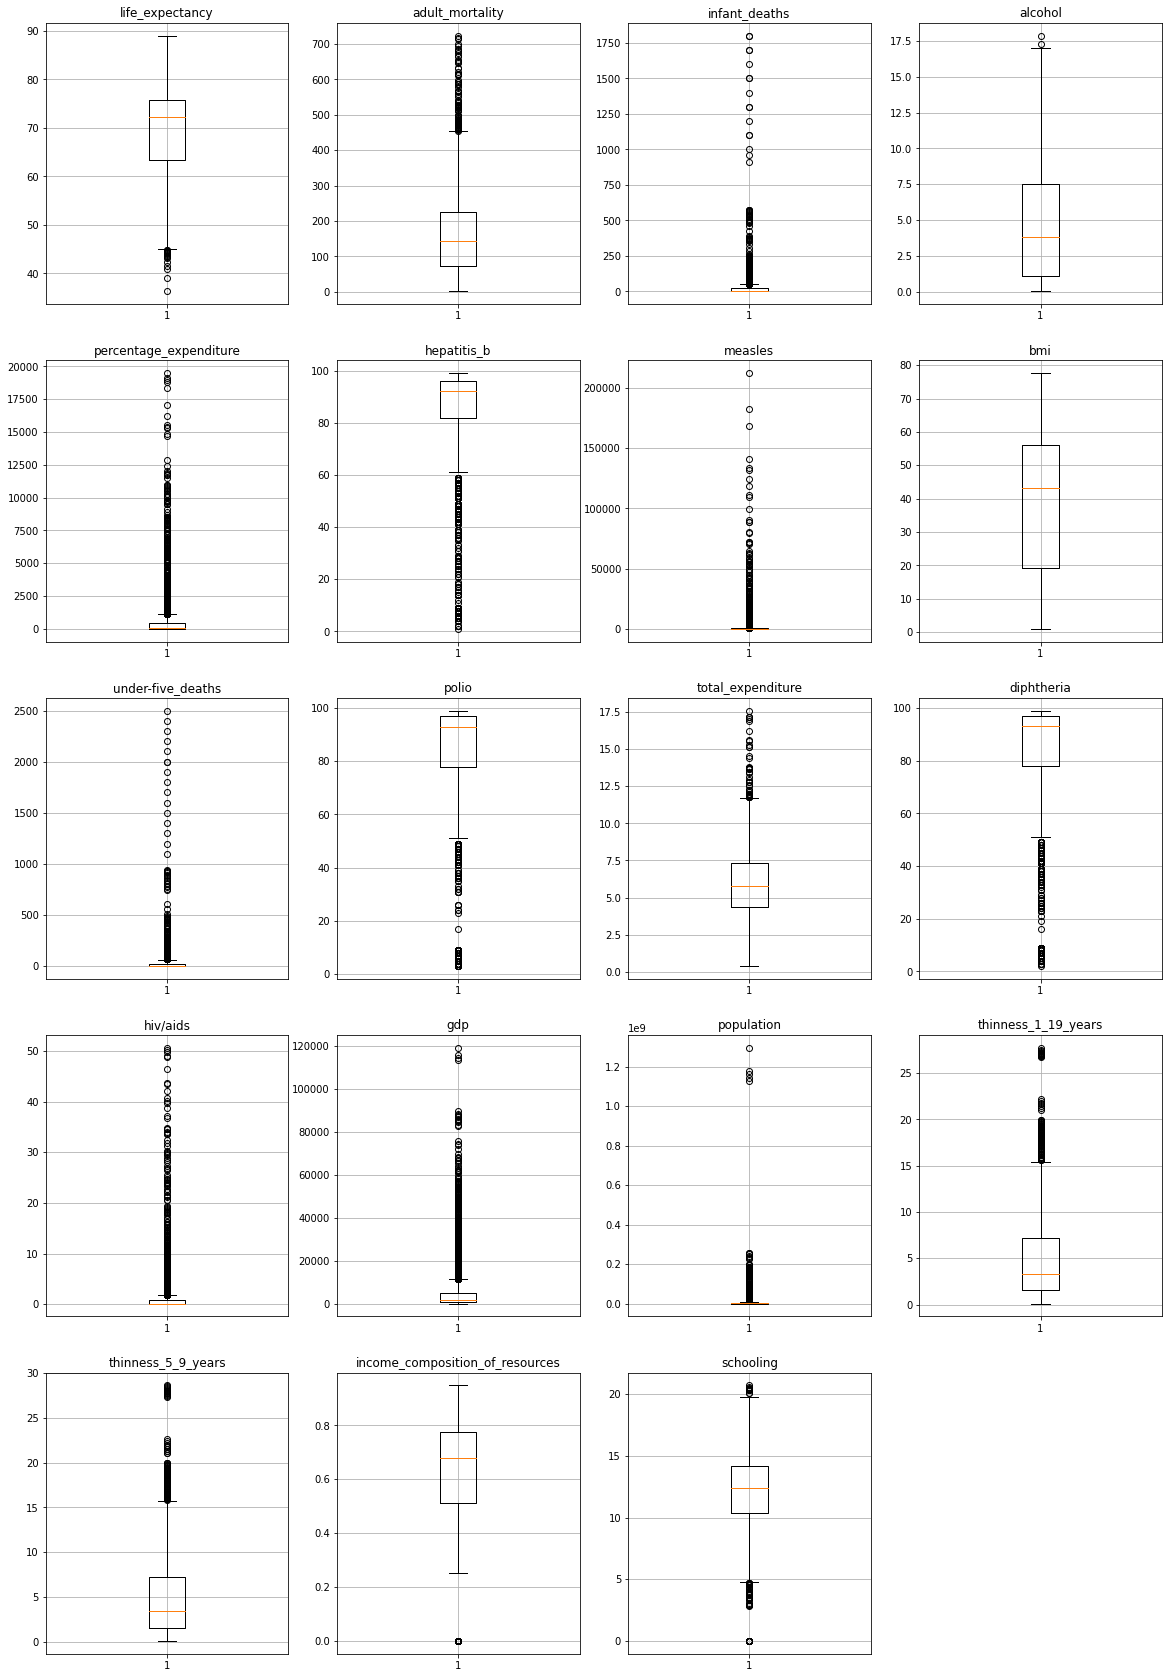

In [39]:
col_dict = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,
            'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,
            'bmi':8,'under-five_deaths':9,'polio':10,'total_expenditure':11,
            'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,
            'thinness_1_19_years':16,'thinness_5_9_years':17,
            'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data_s[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

Infant_Deaths represents number of Infant Deaths per 1000 population. That is why number beyond 1000 is unrealistic. So we will remove them as outliers.

Same applies to Measles and Under_five_deaths because both are number per 1000 population.

As we can see that some countries are spending as high as 20000% of their GDP on health. Most of the countires are spending under 2500% of their GDP on health. Since values are very large in columns of Percentage_expenditure, GDP, and Population, it's better to take a log value or use winsorization if required.

The BMI values are very unrealistic because the value more 40 considered as extreme obesity. The median is more than 40. and some country/countries has mean around 60 which is not possible. We may drop that entire column.

Since pretty much every column other has outliers we can use winsorization.

In [40]:
data_s = data_s[data_s['infant_deaths'] < 1001]
data_s= data_s[data_s['measles'] < 1001]
data_s =  data_s[data_s['under-five_deaths'] < 1001]

In [41]:
data_s.drop(['bmi'], axis=1, inplace=True)

In [42]:
data_s['log_percentage_expenditure'] = np.log(data_s['percentage_expenditure'])
data_s['log_population'] = np.log(data_s['population'])
data_s['log_gdp'] = np.log(data_s['gdp'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [43]:
data_s = data_s.replace([np.inf, -np.inf], 0)
data_s['log_percentage_expenditure']

1       4.297606
2       4.293458
11      2.727596
12      2.405958
16      5.899829
          ...   
2932    2.165322
2933    0.000000
2934    0.000000
2935    0.000000
2936    0.000000
Name: log_percentage_expenditure, Length: 2375, dtype: float64

In [44]:
from scipy.stats.mstats import winsorize

In [46]:
data_s['winz_Life_expectancy'] = winsorize(data_s['life_expectancy'], (0.05,0))
data_s['winz_Adult_mortality'] = winsorize(data_s['adult_mortality'], (0,0.04))
data_s['winz_Alcohol'] = winsorize(data_s['alcohol'], (0.0,0.01))
data_s['winz_HepatitisB'] = winsorize(data_s['hepatitis_b'], (0.20,0.0))
data_s['winz_Polio'] = winsorize(data_s['polio'], (0.20,0.0))
data_s['winz_Total_expenditure'] = winsorize(data_s['total_expenditure'], (0.0,0.02))
data_s['winz_Diphtheria'] = winsorize(data_s['diphtheria'], (0.11,0.0))
data_s['winz_HIV/AIDS'] = winsorize(data_s['hiv/aids'], (0.0,0.21))
data_s['winz_Thinness_1-19_years'] = winsorize(data_s['thinness_1_19_years'], (0.0,0.04))
data_s['winz_Thinness_5-9_years'] = winsorize(data_s['thinness_5_9_years'], (0.0,0.04))
data_s['winz_Income_composition_of_resources'] = winsorize(data_s['income_composition_of_resources'], (0.05,0.0))
data_s['winz_Schooling'] = winsorize(data_s['schooling'], (0.03,0.01))

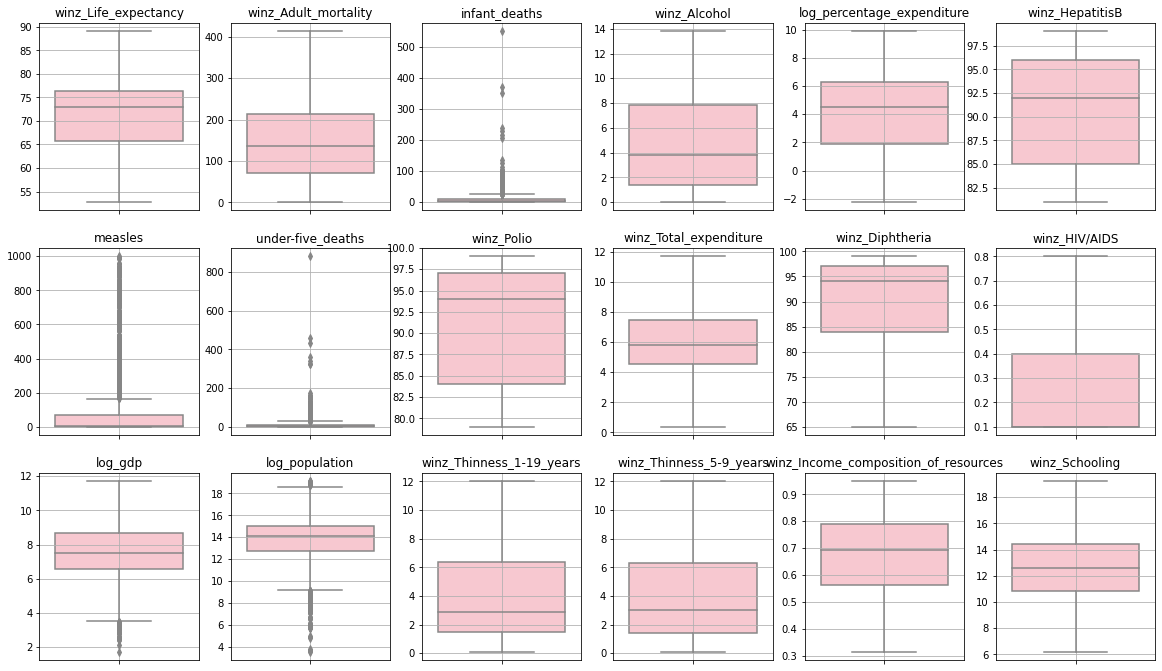

In [47]:
col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'infant_deaths':3,'winz_Alcohol':4,
            'log_percentage_expenditure':5,'winz_HepatitisB':6,'measles':7,'under-five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_gdp':13,'log_population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = data_s[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

In [48]:
data_s.shape

(2375, 36)

###After imputing missing values and dealing with outliers, we are left with 2375 rows.

#Correlation

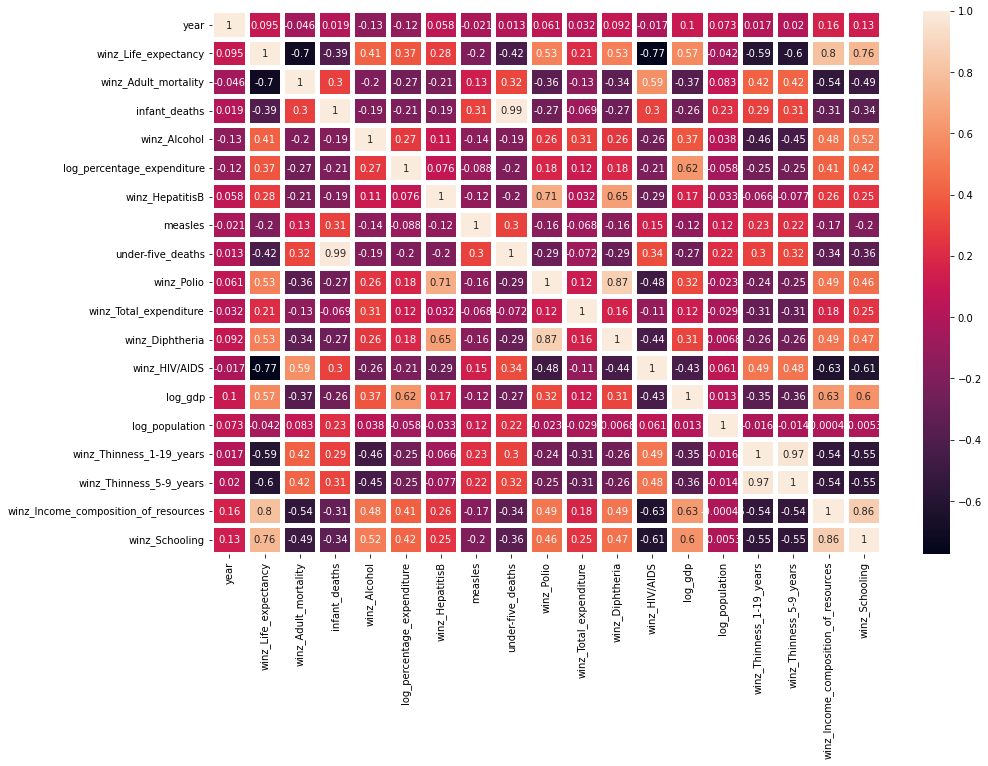

In [49]:
life_exp = data_s[['year', 'country', 'status','winz_Life_expectancy','winz_Adult_mortality','infant_deaths','winz_Alcohol',
            'log_percentage_expenditure','winz_HepatitisB','measles','under-five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_gdp','log_population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

##Some insights from the heatmap are following:

Adult_mortality has negative relation with Schooling, Income_composition_of_resources and positive relation with HIV/AIDS.

Infant_deaths and Under_five_deaths have strong positive relationship.

Schooling and Alcohol have some positive relationship.

Percentage_expenditure has positive relation with Schooling, Income_composition_of_resources, GDP, and Life_expectancy.

HepatitisB has strong positive relation with Polio and Diphtheria. Polio also has strong positive relation with Diphtheria,HepatitisB, and Life_expectancy.

Diphtheria has strong positive relation with Polio and Life_expectancy.

##Through data exploration we will try to explore life_expectancy.

As we can see from the heat map that Life_expectancy has positive relation with schooling,Income_composition_of_resources, GDP,Diphtheria, Polio, and Percentage_expenditure.

Life_expectancy has negative relation with Adult_mortality, Thinness_1-19_years, Thinness_5-9_years, HIV/AIDS, Under_five_deaths, and Infant_deaths.


#Does life expectancy have positive and negative realtionship with drinking alcohol?

From above observation life expectancy has positive relationship with drinking alcohol

#How does Infant and Adult mortality rates affect life expectancy?

##Adut Mortality and life expectancy

There is a negative correlation between Adult Mortaliy and Life expectancy

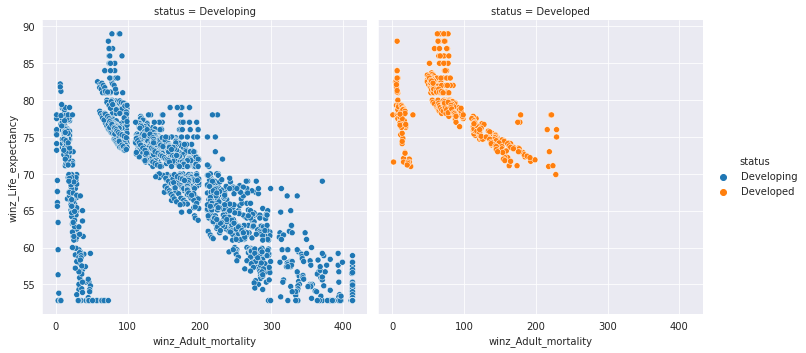

In [70]:
sns.relplot(x="winz_Adult_mortality", 
            y="winz_Life_expectancy", hue="status", col="status", data=data_s);

##Infant deaths


Apparently according to the scatter plot and correlation coefficint of (-0.39) there's a weak correlation between infant deaths and life expectancy. But this result may be misleading, we should investigate the existence of outliers.

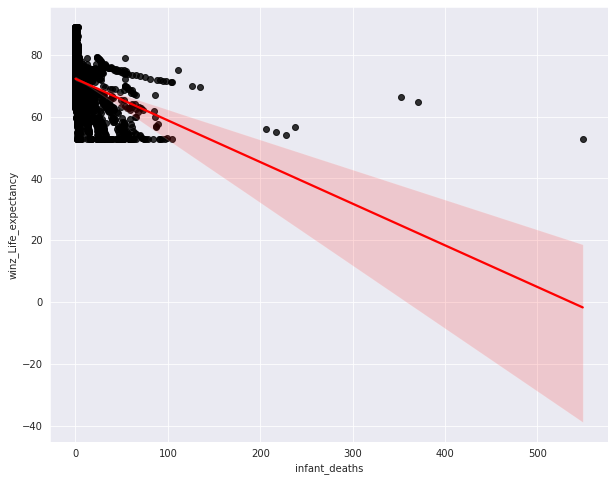

In [71]:
plt.figure(figsize=(10,8))
sns.regplot(x="infant_deaths",
           y="winz_Life_expectancy",
           data = data_s,
           scatter_kws={"color":"k"},
           line_kws={"color":"red"})
plt.show()

We see that there's a high dispersion between the max value (549) and the mean (10), this suggest existence of outliers. aditionally we use a histogram to see the distribution of the variable "infant deaths"

In [72]:
data_s["infant_deaths"].describe()

count    2375.000000
mean       10.176000
std        24.397184
min         0.000000
25%         0.000000
50%         2.000000
75%        10.000000
max       549.000000
Name: infant_deaths, dtype: float64

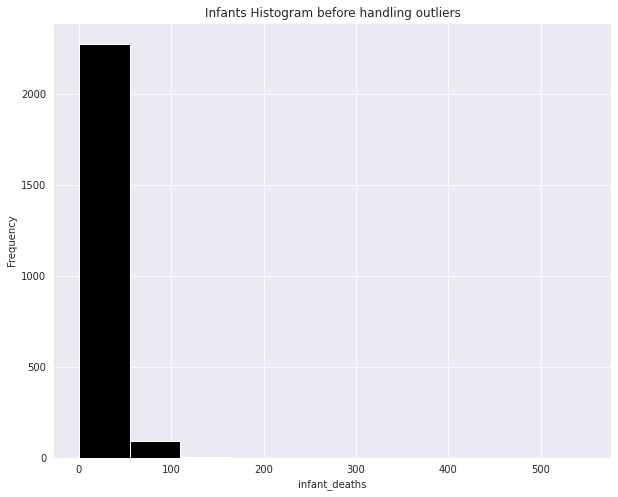

In [73]:
plt.figure(figsize=(10,8))
plt.hist(data_s["infant_deaths"], color="k")
plt.xlabel("infant_deaths")
plt.ylabel("Frequency")
plt.title("Infants Histogram before handling outliers");

In [74]:
# handling outliers, cutting the top and bottom 4% quantile
low, high = data_s["infant_deaths"].quantile([0.04,0.96])
mask = data_s["infant_deaths"].between(low, high)
df1 = data_s[mask]

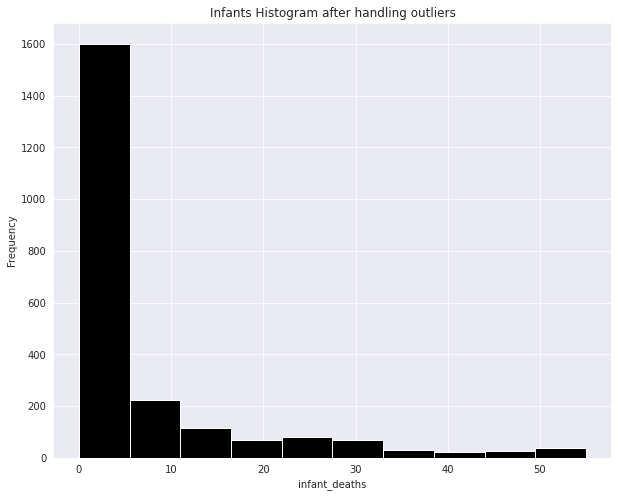

In [75]:
# histogram after outliers
plt.figure(figsize=(10,8))
plt.hist(df1["infant_deaths"], color="k")
plt.xlabel("infant_deaths")
plt.ylabel("Frequency")
plt.title("Infants Histogram after handling outliers")
sns.set_style("darkgrid");

In [76]:
# correlation
df1["infant_deaths"].corr(df1["winz_Life_expectancy"])

-0.4786411348948377


Now we see a moderate negative correlation between the variables, and a the correlation coefiecient is -0.5398

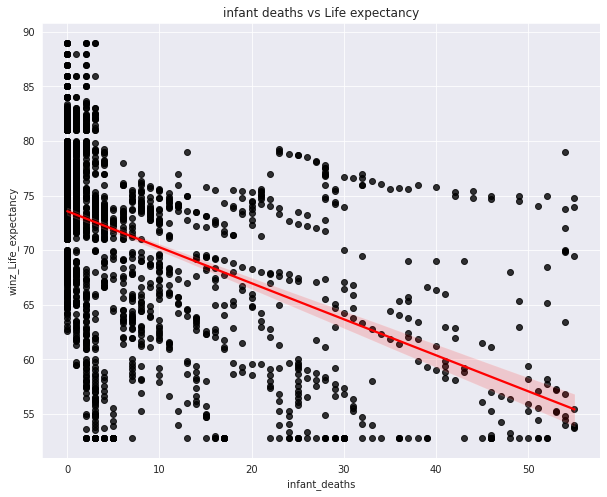

In [77]:
plt.figure(figsize=(10,8))
sns.regplot(x="infant_deaths",
           y="winz_Life_expectancy",
           data = df1,
           scatter_kws={"color":"k"},
           line_kws={"color":"red"})
plt.title("infant deaths vs Life expectancy")
plt.show()

We conclude that infant deaths affect negatively the life expectancy

#How is development or GDP of any country correlated with life expectancy?

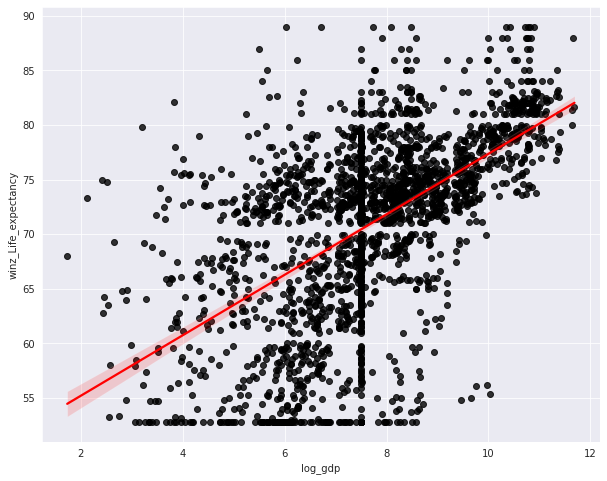

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(x="log_gdp",
           y="winz_Life_expectancy",
           data = data_s,
           scatter_kws={"color":"k"},
           line_kws={"color":"red"})
plt.show()

In [ ]:
data_s["log_gdp"].corr(data_s["winz_Life_expectancy"])

0.5661893119241269

We conclude that gdp of any country is positively correlated with life expectancy

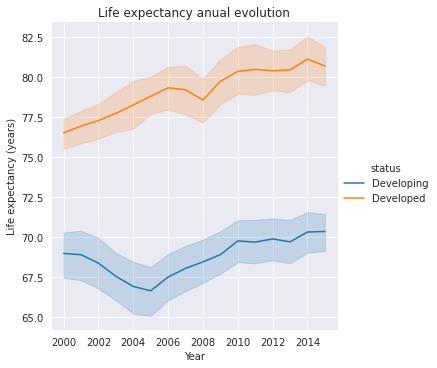

In [ ]:
sns.relplot(x="year", y="winz_Life_expectancy", kind="line", hue="status",data=data_s)
plt.title("Life expectancy annual evolution", fontsize=12)
sns.set_style("white")
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.show()

We see that over time, Life expectancy has a positive trend in both developed and developing countries Developed countries have more years of life expectancy than developing countries

##All 20 predicting factors are chosen really affects the life expectancy. What are the prediciting factors actually affecting the life expectancy?

ans: status, Adult Mortality, percentage expenditure,HIV,GDP,schooling, Income composition of resources

##Does life expectancy have positive or negative correlation with lifestyle, exercies, etc.

1.Life expectancy is inversly related to thiness, which shows lower eating habits results in lower life expectancy

2.Life expectancy is high in developed countries, lifestyle is gererally higher in developed countries.

3.No feature showing exercise

4.LE is positiveley correlated to drinking alcohol